<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/logit_iris_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ロジスティック回帰
ロジスティック回帰によるアヤメのデータ（２次元）の識別

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
#from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [7]:
# data = np.loadtxt("iris.dat",comments='#')
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)


Size of the data =  (100, 2)
N= 100 mdim= 2
size of y (100,)


Logistic 回帰による学習（L2正則化：C=1.0）

In [12]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.01)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

Mean Accuracy: 1.0000
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[0.89861514 0.10138486]
 [0.78399938 0.21600062]
 [0.92479796 0.07520204]
 [0.92524182 0.07475818]
 [0.94224558 0.05775442]
 [0.9216226  0.0783774 ]
 [0.96836668 0.03163332]
 [0.89919669 0.10080331]
 [0.92612232 0.07387768]
 [0.830756   0.169244  ]
 [0.8653977  0.1346023 ]
 [0.94293816 0.05706184]
 [0.83165388 0.16834612]
 [0.95846237 0.04153763]
 [0.82250305 0.17749695]
 [0.95474525 0.04525475]
 [0.9216226  0.0783774 ]
 [0.89861514 0.10138486]
 [0.77520359 0.22479641]
 [0.95637561 0.04362439]
 [0.72217207 0.27782793]
 [0.94189634 0.05810366]
 [0.98245241 0.01754759]
 [0.82894882 0.17105118]
 [0.94293816 0.05706184]
 [0.72727876 0.27272124]
 [0.89919669 0.10080331]
 [0.86688164 0.13311836

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


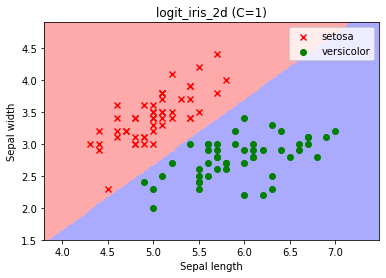

In [11]:
%matplotlib inline
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

Logistic回帰による学習（L2正則化：C=1000.0）

In [13]:
clf_LR = LogisticRegression(C=1000.0, penalty='l2', tol=0.01)
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)


yy = clf_LR.predict(X)

pp = clf_LR.predict_proba(X)

print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)


Mean Accuracy: 1.0000
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Estimated Probability
 [[9.99995352e-01 4.64779718e-06]
 [9.99382816e-01 6.17183750e-04]
 [9.99999728e-01 2.72237574e-07]
 [9.99999790e-01 2.10163556e-07]
 [9.99999902e-01 9.75847456e-08]
 [9.99998334e-01 1.66602785e-06]
 [9.99999999e-01 9.42633154e-10]
 [9.99996412e-01 3.58803725e-06]
 [9.99999875e-01 1.25249521e-07]
 [9.99898164e-01 1.01835714e-04]
 [9.99938746e-01 6.12537810e-05]
 [9.99999942e-01 5.81568106e-08]
 [9.99921382e-01 7.86175513e-05]
 [9.99999997e-01 2.62971642e-09]
 [9.98955264e-01 1.04473597e-03]
 [9.99999902e-01 9.84868996e-08]
 [9.99998334e-01 1.66602785e-06]
 [9.99995352e-01 4.64779718e-06]
 [9.95128226e-01 4.87177396e-03]
 [9.99999979e-01 2.08465595e-08]
 [9.86526420e-01 1.34735802e-02]
 [9.9

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


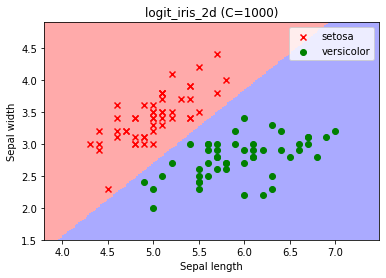

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d (C=1000)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_C1000.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

In [15]:
# 3 classes classification

# Data 
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)
n = X.shape[0]
mdim = X.shape[1]
print('N=', n, 'mdim=', mdim)
print('size of y', y.shape)

Size of the data =  (150, 2)
N= 150 mdim= 2
size of y (150,)


多項Logistic回帰（3クラス）（L2正則化：C=1.0）

In [17]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.01, multi_class='multinomial', solver ='newton-cg')
clf_LR.fit(X, y)

coef_LR = clf_LR.coef_.ravel()
sparsity_LR = np.mean(coef_LR == 0) * 100

print("Mean Accuracy: %.4f" % clf_LR.score(X, y))
print("Sparsity of the parameters: %.2f%%" % sparsity_LR)

yy = clf_LR.predict(X)
pp = clf_LR.predict_proba(X)
print('Estimated Classes\n', yy)
print('Estimated Probability\n', pp)

Mean Accuracy: 0.8200
Sparsity of the parameters: 0.00%
Estimated Classes
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Estimated Probability
 [[9.23457387e-01 5.85214309e-02 1.80211822e-02]
 [7.91537350e-01 1.80937542e-01 2.75251081e-02]
 [9.42346358e-01 5.08794386e-02 6.77420337e-03]
 [9.40534438e-01 5.37769878e-02 5.68857443e-03]
 [9.61842068e-01 2.96236853e-02 8.53424708e-03]
 [9.43185962e-01 3.40956495e-02 2.27183882e-02]
 [9.80220089e-01 1.74247360e-02 2.35517552e-03]
 [9.22910094e-01 6.19366182e-02 1.51532882e-02]
 [9.35976691e-01 6.00159710e-02 4.00733746e-03]
 [8.47155968e-01 1.31188045e-01 2.16559866e-02]
 [8.90201437e-01 7.01201290e-02 3.96784338e-02]
 [9.60780582e-01 3.31848277e-02 6.03459044e-03]
 [8.43526565e-01 1.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


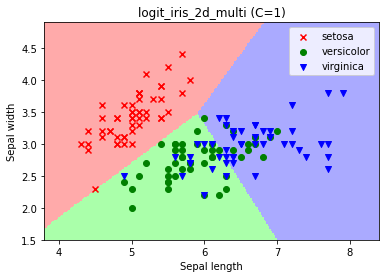

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = clf_LR.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('logit_iris_2d_multi (C=1)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('logit_iris_2d_3class_C1.eps')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()